# Exploratory Data Analysis - Group 2 - Swire Capstone

# Table of Contents
1. [Introduction](#Introduction)
2. [Loading Libraries](#Loading_Libraries)
3. [Loading Datasets and Data Description](#Loading_Datasets_and_Data_Description)
    * 3.1.[Consumer Demographics Data](#Consumer_Demographics_data)
    * 3.2.[Fact Market Demand Data](#Fact_Market_Demand_data)
    * 3.3.[Zipcode to MarketKey Data](#Zipcode_to_MarketKey_data)
4. [Exploring the data columns](#Explore_data_columns)
     * 4.1.[Distribution of drink categories](#Dist_drink_cat)
     * 4.2.[Top 20 packages by sales](#top_20_pack_sales)
     * 4.3.[Relationship between Unit Sales and Dollar Sales by Manufacturer](#unit_dollar_manu)
     * 4.4.[Average Unit Sales by Manufacturer](#avg_unitsales_manu)
     * 4.5.[Caloric segment Distribution](#cal_seg_dist)
     * 4.6.[Total Dollar Sales by Category](#dollar_sales_cat)
     * 4.7.[Mean Unit Sales by Category](#"mean_unit_sales_cat)
     * 4.8.[Caloric segment Vs. Category Distribution](#Cal_seg_cat_dist)
5. [Joining datasets and Target variable exploration](#join_data_target_explore)
     * 5.1.[Top 10 zipcodes by Unitsales](#top10_zip_unitsales)
     * 5.2.[Top Brand by Units Sold](#top_brands_units_sold)
     * 5.3.[Seasonality of Sales](#sales_seasonality")
6. [Correlation](#correlation)
7. [Missing Data and Imputation](#missing_data)
8. [Outliers analysis](#outliers)
9. [Summary and Next steps](#results)
10. [Team member's Contributions](#contri)
11. [Modeling](#modeling)
    1. [XGBoost](#xgboost)

## 1. Introduction <a id='Introduction'></a>


Swire Coca-Cola, a leading beverage manufacturer, faces the challenge of accurately forecasting the demand for its innovative products in order to optimize production planning and inventory management. With the beverage industry constantly evolving due to changing consumer preferences, technological advancements, and increasing emphasis on sustainability and health, launching innovative products is crucial for revenue growth and market competitiveness.
The goal is to develop a reliable forecast model that predicts the demand for Swire's innovation products at the weekly level. This involves leveraging historical data for similar products, incorporating relevant census data to derive insightful business conclusions such as identifying ideal locations or demographics for different products, and considering factors like seasonality, trends, and other influencers.

Specifically, the project aims to answer questions such as:

1. Which weeks of the year would each innovation product perform best in the market, and what is the forecasted demand for those weeks?
2. What will be the forecasted demand for products with specific release timelines, such as before or after Easter?
3. What will be the forecasted demand in those regions for products with regional releases?
4. Based on consumer demographics data, what are the ideal locations or demographics for each product?

The first step is to check the data provided and then do the Exploratory Data Analysis(EDA) to understand the data and its complexities. Then, we will move forward to clean the data so that the data will be ready for applying the models. There are several steps for cleaning data. One step is appropriately treating the Null values present, like using the imputation method with ‘median’ and ‘mode’ according to the data types. Another step is to correct the values like outliers. By completing all these steps, we can ensure the data is cleaned and ready to be fitted in Prediction models. 

As a step within the CRISP-DM cycle, let's delve into the data understanding following our comprehension of the Business Problem Statement.

## 2. Loading Libraries<a id='Loading_Libraries'></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

%matplotlib inline

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

# setting figure size for the notebook
sns.set(rc={'figure.figsize':(15,6)})

## 3. Loading Datasets and Data description<a id='Loading_Datasets_and_Data_Description'></a>

### 3.1 Consumer Demographics Data <a name = "Consumer_Demographics_data"></a>

In [2]:
# demoDF = pd.read_excel('consumer_demographics.xlsx')
demoDF = pd.read_excel('consumer_demographics.xlsx', sheet_name='Data')

demoDF.head(10)

,Geography Name,Zip,City,State,Segment,Criteria,Count,Criteria_Unit
0,"85281 Tempe, AZ",85281,Tempe,AZ,Household Income,"Income Under $10,000",3628,HHs
1,"85705 Tucson, AZ",85705,Tucson,AZ,Household Income,"Income Under $10,000",3299,HHs
2,"85364 Yuma, AZ",85364,Yuma,AZ,Household Income,"Income Under $10,000",2852,HHs
3,"85301 Glendale, AZ",85301,Glendale,AZ,Household Income,"Income Under $10,000",2425,HHs
4,"85719 Tucson, AZ",85719,Tucson,AZ,Household Income,"Income Under $10,000",2305,HHs
5,"85716 Tucson, AZ",85716,Tucson,AZ,Household Income,"Income Under $10,000",1811,HHs
6,"86505 Ganado, AZ",86505,Ganado,AZ,Household Income,"Income Under $10,000",1736,HHs
7,"85710 Tucson, AZ",85710,Tucson,AZ,Household Income,"Income Under $10,000",1582,HHs
8,"85706 Tucson, AZ",85706,Tucson,AZ,Household Income,"Income Under $10,000",1500,HHs
9,"85009 Phoenix, AZ",85009,Phoenix,AZ,Household Income,"Income Under $10,000",1478,HHs


In [3]:
demoDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491400 entries, 0 to 491399
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Geography Name  491400 non-null  object
 1   Zip             491400 non-null  int64 
 2   City            491400 non-null  object
 3   State           491400 non-null  object
 4   Segment         491400 non-null  object
 5   Criteria        491400 non-null  object
 6   Count           491400 non-null  int64 
 7   Criteria_Unit   491400 non-null  object
dtypes: int64(2), object(6)
memory usage: 30.0+ MB


In [4]:
print('Shape of the demographic file:', demoDF.shape)

Shape of the demographic file: (491400, 8)


demoDF has 491400 rows and 8 columns

In [5]:
demoDF.dtypes

Geography Name    object
Zip                int64
City              object
State             object
Segment           object
Criteria          object
Count              int64
Criteria_Unit     object
dtype: object

In [6]:
demoDF.columns

Index(['Geography Name', 'Zip', 'City', 'State', 'Segment', 'Criteria',
       'Count', 'Criteria_Unit'],
      dtype='object')

### 3.2 Fact Market Demand Data <a name = "Fact_Market_Demand_data"></a>

In [7]:
# reading in the parquet file
parquetDF = pd.read_parquet('FACT_MARKET_DEMAND.parquet')
parquetDF.head()

,DATE,MARKET_KEY,CALORIC_SEGMENT,CATEGORY,UNIT_SALES,DOLLAR_SALES,MANUFACTURER,BRAND,PACKAGE,ITEM
0,2021-08-21,524,DIET/LIGHT,SSD,69.0,389.74,SWIRE-CC,DIET YAWN,12SMALL 12ONE CUP,YAWN ZERO SUGAR GENTLE DRINK SUPER-JUICE DURI...
1,2022-05-07,637,REGULAR,SSD,4.0,30.96,COCOS,GORGEOUS ORANGEOUS,12SMALL 12ONE CUP,GORGEOUS SUNSET OUS GENTLE DRINK AVOCADO CUP ...
2,2022-10-22,628,DIET/LIGHT,ING ENHANCED WATER,1.0,2.25,JOLLYS,DIGRESS FLAVORED,20SMALL MULTI JUG,DIGRESS ZERO NUTRIENT ENHANCED WATER BVRG PURP...
3,2022-08-13,216,REGULAR,SSD,3.0,7.55,COCOS,CHERRY FIZZ,1L MULTI JUG,KOOL! RED GENTLE DRINK RED COLA CONTOUR JUG ...
4,2022-01-01,210,REGULAR,SSD,4.0,25.96,COCOS,RADIANT'S,12SMALL 12ONE CUP,RADIANT'S GENTLE DRINK GINGER ALE CUP 12 LIQUI...


In [8]:
# looking at the shape of the file
print("Shape of the Parquet file:", parquetDF.shape)

Shape of the Parquet file: (24461424, 10)


In [9]:
# Convert the 'DATE' column to datetime
parquetDF['DATE'] = pd.to_datetime(parquetDF['DATE'], format='%Y-%m-%d')

# Check the DataFrame info again to confirm the change
parquetDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24461424 entries, 0 to 24461423
Data columns (total 10 columns):
 #   Column           Dtype         
---  ------           -----         
 0   DATE             datetime64[ns]
 1   MARKET_KEY       int64         
 2   CALORIC_SEGMENT  object        
 3   CATEGORY         object        
 4   UNIT_SALES       float64       
 5   DOLLAR_SALES     float64       
 6   MANUFACTURER     object        
 7   BRAND            object        
 8   PACKAGE          object        
 9   ITEM             object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 1.8+ GB


The 'DATE' column is appropriately formatted as datetime format and can be used for further product analysis.

In [10]:
parquetDF.shape

(24461424, 10)

Parquet DF is huge dataset with 24461424 rows and 10 columns.

In [11]:
parquetDF.dtypes

DATE               datetime64[ns]
MARKET_KEY                  int64
CALORIC_SEGMENT            object
CATEGORY                   object
UNIT_SALES                float64
DOLLAR_SALES              float64
MANUFACTURER               object
BRAND                      object
PACKAGE                    object
ITEM                       object
dtype: object

In [12]:
parquetDF.columns

Index(['DATE', 'MARKET_KEY', 'CALORIC_SEGMENT', 'CATEGORY', 'UNIT_SALES',
       'DOLLAR_SALES', 'MANUFACTURER', 'BRAND', 'PACKAGE', 'ITEM'],
      dtype='object')

In [13]:
brand_value_counts = parquetDF['BRAND'].value_counts()

display(brand_value_counts)

BRAND
CROWN                                  1239010
REAL-TIME EDITIONS                      827868
DIGRESS FLAVORED                        731199
MYTHICAL BEVERAGE ULTRA                 718536
BUBBLE JOY                              535030
                                        ...   
PAPI VANILLA REAL SUGAR                      1
LAUGHING MYTHICAL BEVERAGE CHAI HAI          1
TIPCAL CANARY TWISTER SODA                   1
MIST TWST NAT CBRY                           1
VAULTLESS                                    1
Name: count, Length: 319, dtype: int64

The output shows the distribution of brands in the dataset, allowing us to identify the prevalence of each brand based on the count of occurrences. Notably, 'CROWN' stands out as the most frequent brand, appearing 1,239,010 times, followed closely by 'REAL-TIME EDITIONS' with 827,868 occurrences.

Moreover, the length value indicates that there are a total of 319 unique brands present in the dataset.

### 3.3 Zipcode to MarketKey Data <a name = "Zipcode_to_MarketKey_data"></a>

In [14]:
zipmap = pd.read_csv('zip_to_market_unit_mapping.csv')

zipmap.head(5)

,ZIP_CODE,MARKET_KEY
0,57714,161
1,57772,161
2,67701,1135
3,67740,1135
4,67748,1135


In [15]:
zipmap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2382 entries, 0 to 2381
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   ZIP_CODE    2382 non-null   int64
 1   MARKET_KEY  2382 non-null   int64
dtypes: int64(2)
memory usage: 37.3 KB


In [16]:
zipmap.shape

(2382, 2)

Zipmap DF has 2382 rows and 2 columns.

In [17]:
zipmap.dtypes

ZIP_CODE      int64
MARKET_KEY    int64
dtype: object

In [18]:
zipmap.columns

Index(['ZIP_CODE', 'MARKET_KEY'], dtype='object')

In [19]:
min_date = parquetDF['DATE'].min()
max_date = parquetDF['DATE'].max()

print("Minimum Date: ", min_date)
print("Maximum Date: ", max_date)

Minimum Date:  2020-12-05 00:00:00
Maximum Date:  2023-10-28 00:00:00


The minimum date in the dataset is December 5, 2020, and the maximum date is October 28, 2023.

## 4. Exploring the data columns<a id='Explore_data_columns'></a>

In [20]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

parquetDF.describe()

,DATE,MARKET_KEY,UNIT_SALES,DOLLAR_SALES
count,24461424,24461424.00,24461424.00,24461424.00
mean,2022-04-25 16:08:55.221432320,593.14,174.37,591.14
min,2020-12-05 00:00:00,1.00,0.04,0.01
25%,2021-08-14 00:00:00,260.00,11.00,36.59
50%,2022-04-23 00:00:00,547.00,40.00,135.05
75%,2022-12-31 00:00:00,845.00,126.00,427.14
max,2023-10-28 00:00:00,6802.00,96776.00,492591.07
std,NaN,605.88,857.81,3040.54


The above table shows the aggregate functions like min,max,mean for each column.

In [21]:
min_unit_sales_index = parquetDF['UNIT_SALES'].idxmin()
min_unit_sales_row = parquetDF.loc[min_unit_sales_index]

min_unit_sales_row

DATE                                             2023-10-14 00:00:00
MARKET_KEY                                                       484
CALORIC_SEGMENT                                           DIET/LIGHT
CATEGORY                                                      ENERGY
UNIT_SALES                                                      0.04
DOLLAR_SALES                                                    2.00
MANUFACTURER                                                   ALLYS
BRAND                                                 REAL-TIME ZERO
PACKAGE                                             8SMALL 24ONE CUP
ITEM               REAL-TIME ZERO ENERGY DRINK UNFLAVORED ZERO SU...
Name: 25460, dtype: object

The row with the minimum unit sales corresponds to a record where the unit sales for the item are 0.04, resulting in $2.00 in dollar sales. The manufacturer of this item is 'ALLYS', and the brand associated with it is 'REAL-TIME ZERO'.

In [22]:
min_dollar_sales_index = parquetDF['DOLLAR_SALES'].idxmin()
min_dollar_sales_row = parquetDF.loc[min_dollar_sales_index]

min_dollar_sales_row

DATE                                         2021-12-11 00:00:00
MARKET_KEY                                                  1172
CALORIC_SEGMENT                                          REGULAR
CATEGORY                                                     SSD
UNIT_SALES                                                  1.00
DOLLAR_SALES                                                0.01
MANUFACTURER                                            SWIRE-CC
BRAND                                                      SMASH
PACKAGE                                        16SMALL MULTI CUP
ITEM               SMASH GENTLE DRINK PINK  CUP 16 LIQUID SMALL 
Name: 3592, dtype: object

The row with the minimum dollar sales corresponds to a record where the unit sales for the item are 1.00, resulting in a minimal dollar sales value of $0.01. The manufacturer of this item is 'SWIRE-CC', and the brand associated with it is 'SMASH'.

In [23]:
print('Number of duplicate rows: ', parquetDF.duplicated().sum())

Number of duplicate rows:  0


The dataset does not contain any duplicate entries.

In [24]:
print(parquetDF.isnull().sum())

DATE                   0
MARKET_KEY             0
CALORIC_SEGMENT    59725
CATEGORY               0
UNIT_SALES             0
DOLLAR_SALES           0
MANUFACTURER           0
BRAND                  0
PACKAGE                0
ITEM                   0
dtype: int64


In [25]:
# Create new features from 'DATE'
parquetDF['YEAR'] = parquetDF['DATE'].dt.year
parquetDF['MONTH'] = parquetDF['DATE'].dt.month
parquetDF['DAY'] = parquetDF['DATE'].dt.day
parquetDF['DAY_OF_WEEK'] = parquetDF['DATE'].dt.dayofweek


Extracted the year, month, day, and day of the week information from the dates and assigned them to new columns in the DataFrame.

### 4.1 Distribution of drink categories <a name = "Dist_drink_cat"></a>

/Users/joshuahawley/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



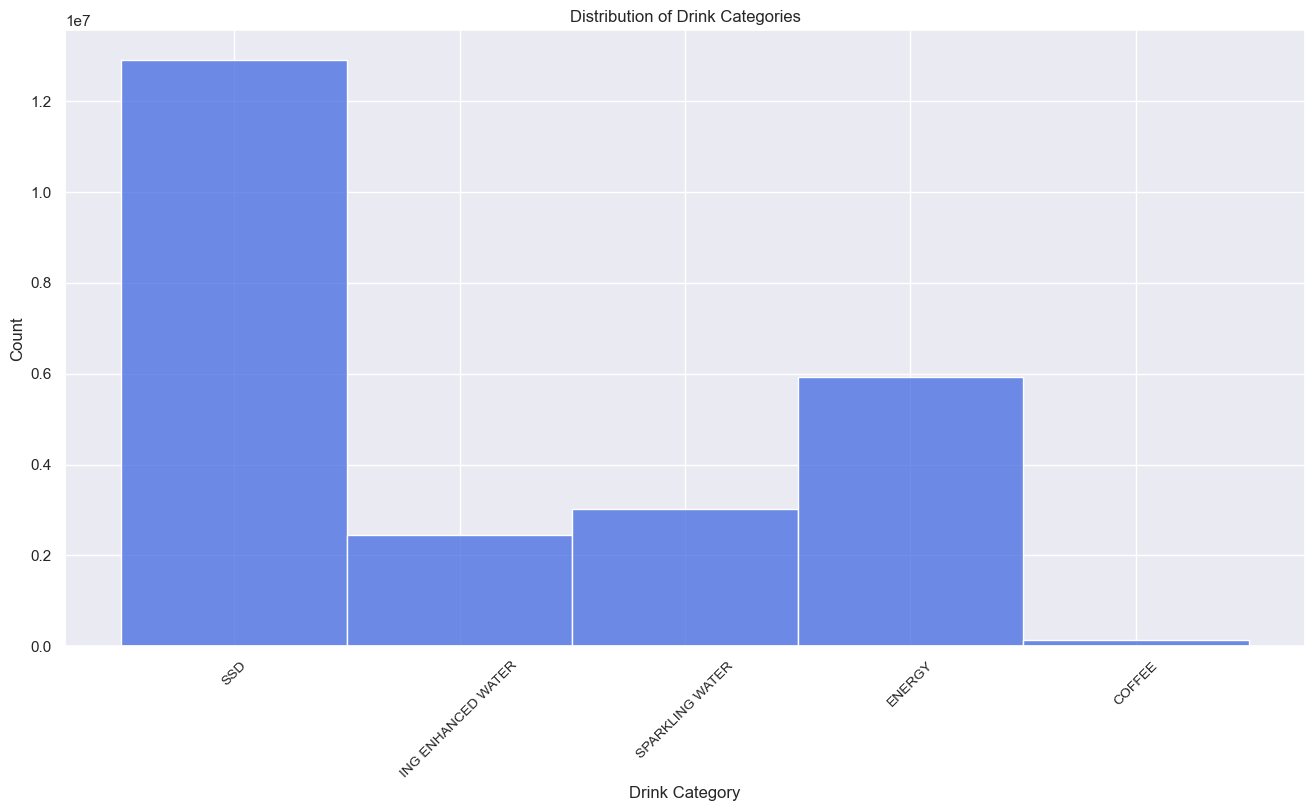

In [26]:
fig, ax = plt.subplots(figsize=(16, 8))

# Use a different color (e.g., a shade of blue) and adjust the bin size using the `binwidth` parameter
sns.histplot(data=parquetDF, x='CATEGORY', color='royalblue', binwidth=0.2)

# Rotate the x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45, fontsize=10)

# Set custom axis labels
ax.set_xlabel('Drink Category')
ax.set_ylabel('Count')

# Set plot title
plt.title('Distribution of Drink Categories')

# Show the plot
plt.show()


The histogram displays the distribution of drink categories in the dataset. The category 'SSD' (Sugared Soft Drinks) has the highest count, dominating the distribution with significantly more occurrences than other categories. The 'ENERGY' category is the second most common, followed by 'SPARKLING WATER' and 'ING ENHANCED WATER', both of which have considerably lower counts. 'COFFEE' has the fewest counts, indicating it is the least common among the categories analyzed.

### 4.2 Top 20 packages by sales <a name = "top_20_pack_sales"></a>

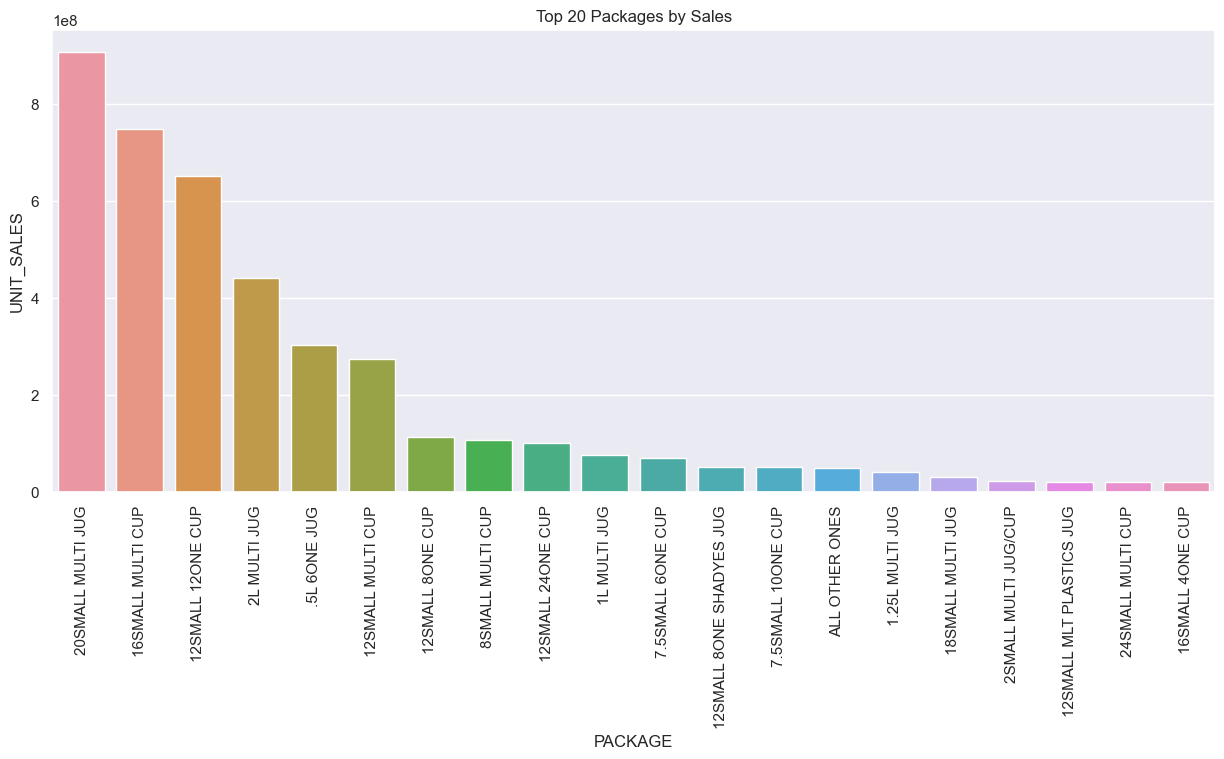

In [27]:
# UNIT_SALES by PACKAGE

# plt.style.use('seaborn-whitegrid')

# Aggregate data to get total UNIT_SALES for each PACKAGE
agg_df = parquetDF.groupby('PACKAGE')['UNIT_SALES'].sum().reset_index()

# Sort by UNIT_SALES and select top 20
top_20_df = agg_df.sort_values('UNIT_SALES', ascending=False).head(20)

# Create the bar chart
sns.barplot(x='PACKAGE', y='UNIT_SALES', data=top_20_df, errorbar=None)

# Rotate x-axis labels
plt.xticks(rotation=90)

# Add title
plt.title("Top 20 Packages by Sales")

# Show the plot
plt.show()

The bar chart illustrates the unit sales for the top 20 beverage packages. The '20SML MULTI JUG' is the most popular, with the highest unit sales, followed by '16SML MULTI CUP' and '12SML MULTI JUG'. There is a significant drop in sales after the top two packages, indicating a strong preference or higher demand for these package types. The variety of package types in the top 20 suggests a diverse market with different consumer preferences.

### 4.3 Relationship between Unit Sales and Dollar Sales by Manufacturer<a name = "unit_dollar_manu"></a>

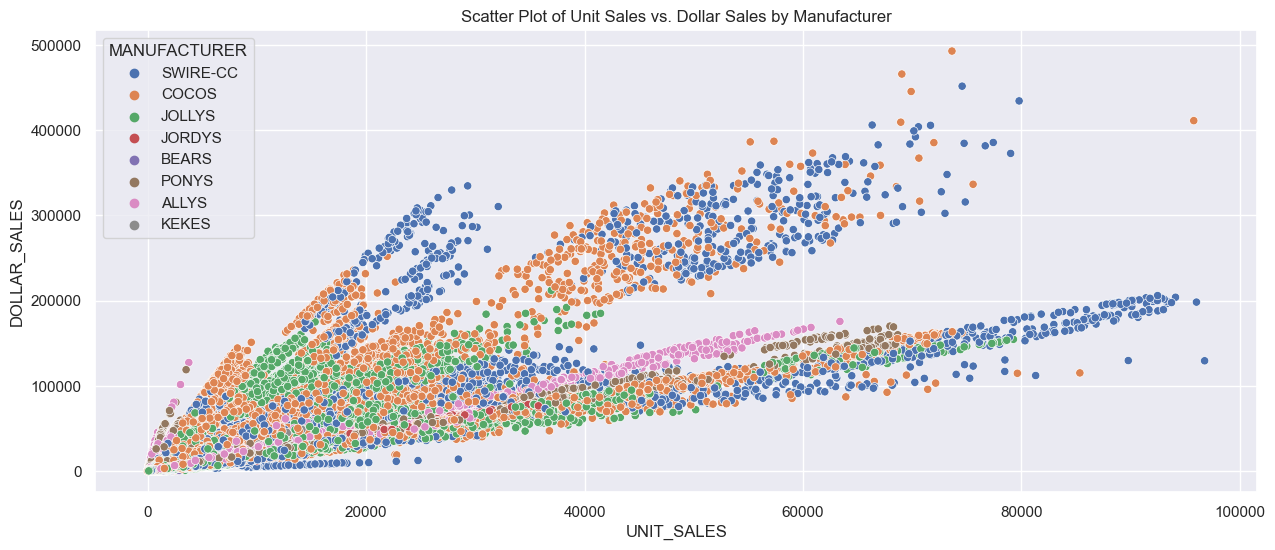

In [28]:
sns.scatterplot(x="UNIT_SALES", y="DOLLAR_SALES", hue="MANUFACTURER", data=parquetDF)
# Add title
plt.title('Scatter Plot of Unit Sales vs. Dollar Sales by Manufacturer')
plt.show()

The scatter plot shows the relationship between unit sales and dollar sales for various manufacturers. For instance, SWIRE-CC, represented by the blue dots, shows a broad distribution across both axes, indicating a diverse range of products with varying sales volumes and revenue. JOLLYS (green dots) also has a wide spread, but with many data points clustered at the lower end of dollar sales, suggesting a focus on products that sell in high volume but may have lower prices. In contrast, manufacturers like COCOS and JORDYS (orange and red dots, respectively) have data points that suggest specialization in products with higher revenue per unit, indicating a focus on premium or higher-priced offerings. The scatter plot underscores the varying market strategies and product portfolios of these manufacturers.

### 4.4 Average Unit Sales by Manufacturer<a name = "avg_unitsales_manu"></a>

In [29]:
# Set 'DATE' as the index to enable resampling
parquetDF.set_index('DATE', inplace=True)

# Resample 'UNIT_SALES' to get the weekly average for each 'MANUFACTURER'
smoothed_df = parquetDF.groupby('MANUFACTURER')['UNIT_SALES'].resample('W').mean().reset_index()

# Create the interactive line chart with the smoothed data
fig = px.line(smoothed_df, x="DATE", y="UNIT_SALES", color="MANUFACTURER")
fig.update_layout(title='Weekly Average Unit Sales by Manufacturer')
fig.show()

/Users/joshuahawley/anaconda3/lib/python3.11/site-packages/plotly/express/_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/Users/joshuahawley/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



This plot shows the weekly average unit sales by various manufacturers over a time span from January 2021 to July 2023. SWIRE-CC (green line) consistently maintains high sales throughout the period, while other manufacturers like JOLLYS (purple line) and JORDYS (orange line) exhibit more fluctuation. The sharp peaks and troughs for certain manufacturers suggest periodic surges in sales, which could be due to seasonal influences, marketing campaigns, or other external events. The chart illustrates the competitive landscape in which these manufacturers operate and how their sales volumes compare week to week.

### 4.5 Caloric segment Distribution<a name = "cal_seg_dist"></a>

In [30]:
caloricsegment_value_counts = parquetDF['CALORIC_SEGMENT'].value_counts()
display(caloricsegment_value_counts)

CALORIC_SEGMENT
REGULAR       12231585
DIET/LIGHT    12170114
Name: count, dtype: int64

The output shows the count of occurrences for each category in the 'CALORIC_SEGMENT' column, indicating that 'REGULAR' has 12,231,585 occurrences and 'DIET/LIGHT' has 12,170,114 occurrences.

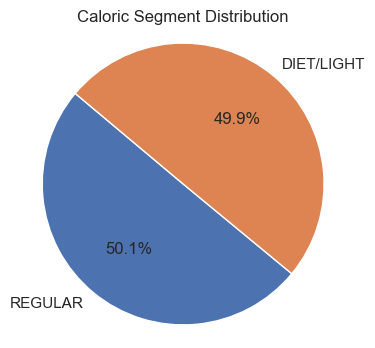

In [31]:
# Create a pie chart

segment_counts = parquetDF['CALORIC_SEGMENT'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Caloric Segment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

The pie chart illustrates a nearly equal distribution between the 'Regular' and 'Diet/Light' caloric segments of drinks, with 'Regular' having a slight edge at 50.1%, while 'Diet/Light' stands close behind at 49.9%. This nearly balanced split implies either a well-matched consumer preference or an evenly distributed market offering for both types of caloric segments within this dataset.

### 4.6 Total Dollar Sales by Category<a name = "dollar_sales_cat"></a>

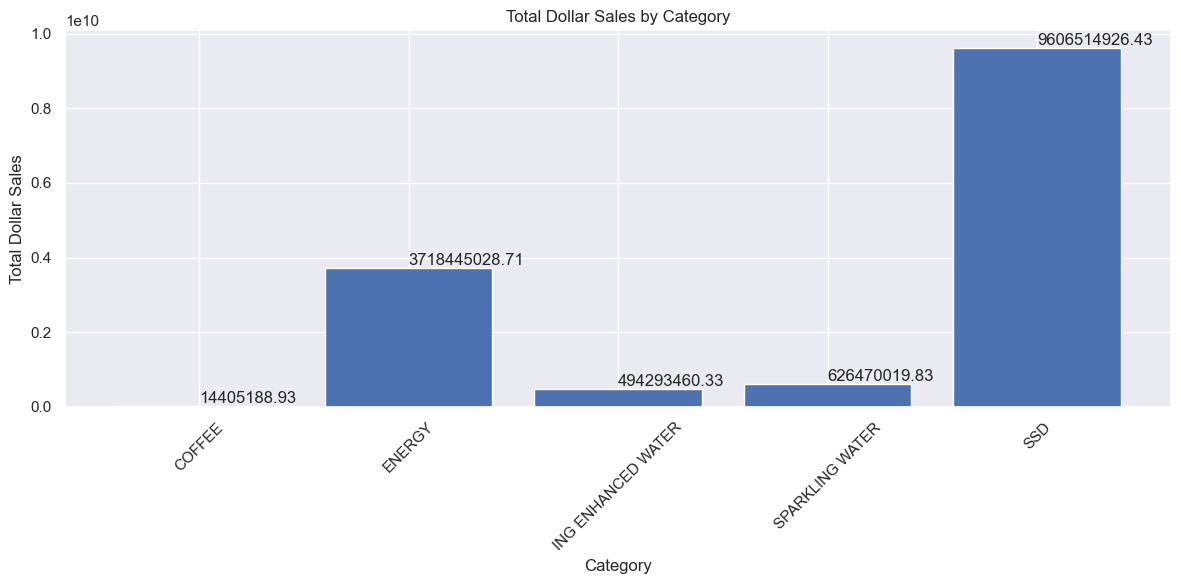

In [32]:
# Create a bar plot for dollar sales by category
category_sales = parquetDF.groupby('CATEGORY')['DOLLAR_SALES'].sum()

plt.figure(figsize=(12, 6))
bars = plt.bar(category_sales.index, category_sales.values)

# Add labels to each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

plt.title('Total Dollar Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Dollar Sales')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()


The bar chart depicts the total dollar sales across different beverage categories. 'SSD' (Sugared Soft Drinks) emerges as the frontrunner by a notable margin, indicating its dominance as the highest revenue-generating category. Following closely, 'SPARKLING WATER' claims the second-highest dollar sales, with 'ING ENHANCED WATER' trailing not far behind. 'ENERGY' drinks secure the fourth position, while 'COFFEE' ranks lowest in terms of dollar sales among the displayed categories. This highlights a pronounced market preference for sugared soft drinks in expenditure, while also showcasing significant sales for healthier alternatives like sparkling and enhanced water.

### 4.7 Mean Unit Sales by Category<a name = "mean_unit_sales_cat"></a>

In [33]:
parquetDF.groupby('CATEGORY')['UNIT_SALES'].mean()

CATEGORY
COFFEE                45.10
ENERGY               202.01
ING ENHANCED WATER    80.45
SPARKLING WATER       55.04
SSD                  208.87
Name: UNIT_SALES, dtype: float64

The average unit sales indicate that 'SSD' (Sugared Soft Drinks) and 'ENERGY' drinks have the highest mean unit sales at 208.87 and 202.01 respectively, while 'COFFEE' exhibits the lowest at 45.10.

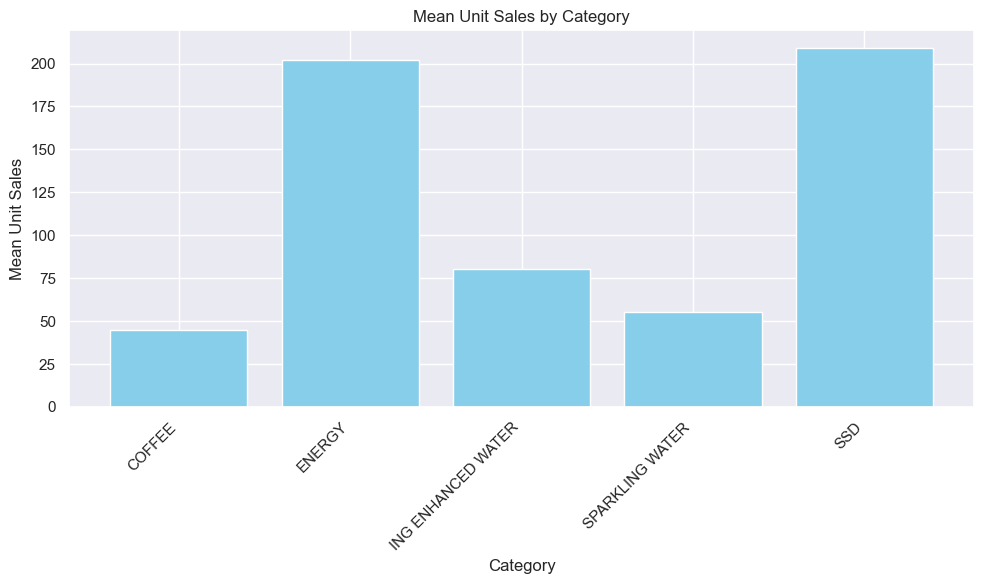

In [34]:
# Calculate mean unit sales for each category
mean_unit_sales = parquetDF.groupby('CATEGORY')['UNIT_SALES'].mean()

# Extract category names and mean unit sales values
categories = mean_unit_sales.index
unit_sales_values = mean_unit_sales.values

# Create a column chart for mean unit sales by category
plt.figure(figsize=(10, 6))
plt.bar(categories, unit_sales_values, color='skyblue')
plt.title('Mean Unit Sales by Category')
plt.xlabel('Category')
plt.ylabel('Mean Unit Sales')
plt.xticks(rotation=45, ha='right')  # Rotate category labels for better visibility
plt.tight_layout()
plt.show()

The plot displays the mean unit sales for different beverage categories, arranged in descending order. 'SSD' (Sugared Soft Drinks) exhibits the highest mean unit sales, followed by 'ENERGY' drinks.This ranking provides insights into the average sales volume per transaction across various beverage categories, highlighting the relative popularity or demand for each category.

### 4.8 Caloric segment Vs. Category Distribution<a name = "Cal_seg_cat_dist"></a>

In [35]:
pd.crosstab(parquetDF['CALORIC_SEGMENT'], parquetDF['CATEGORY'])

CATEGORY,COFFEE,ENERGY,ING ENHANCED WATER,SPARKLING WATER,SSD
CALORIC_SEGMENT,,,,,
DIET/LIGHT,33275,3142778,1973685,2986849,4033527
REGULAR,112261,2789301,478771,32215,8819037


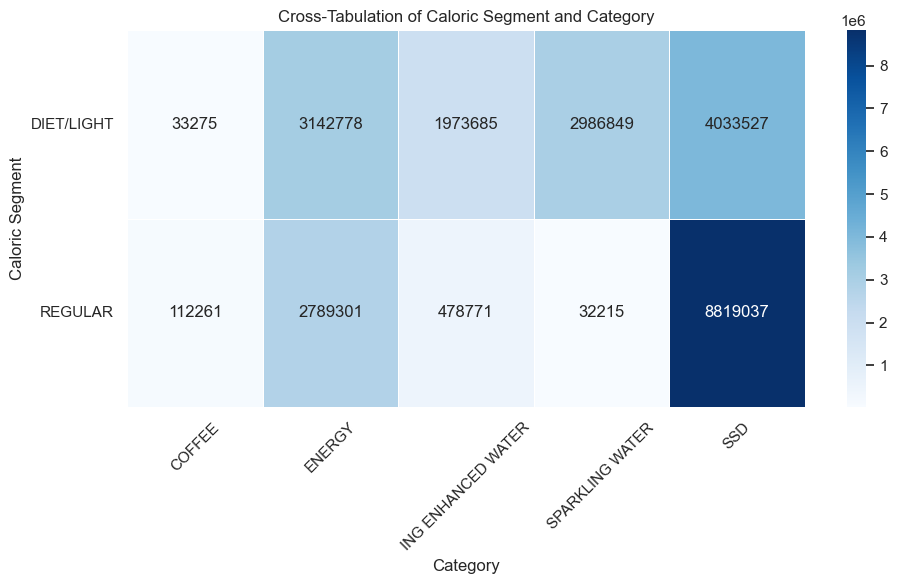

In [36]:
# Create cross-tabulation of caloric segment and category
cross_tab = pd.crosstab(parquetDF['CALORIC_SEGMENT'], parquetDF['CATEGORY'])

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, cmap='Blues', annot=True, fmt='d', linewidths=.5)
plt.title('Cross-Tabulation of Caloric Segment and Category')
plt.xlabel('Category')
plt.ylabel('Caloric Segment')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

The heatmap illustrates the relationship between caloric segments and beverage categories. 'SSD' (Sugared Soft Drinks) predominates in the 'Regular' caloric segment, indicating significant sales volume. Although 'SSD' also appears in the 'Diet/Light' segment, the count is lower compared to its 'Regular' counterpart. Other categories such as 'COFFEE', 'ENERGY', 'ING ENHANCED WATER', and 'SPARKLING WATER' show smaller numbers in both segments. Interestingly, 'ENERGY' drinks exhibit a fairly even distribution between 'Diet/Light' and 'Regular'. This visualization provides insights into sales dynamics relative to caloric content across different beverage types.

## 5. Joining datasets and Target variable exploration <a id='join_data_target_explore'></a>

In [37]:
num_unique_values_all_columns = parquetDF.nunique()
print(num_unique_values_all_columns)

MARKET_KEY            200
CALORIC_SEGMENT         2
CATEGORY                5
UNIT_SALES          26847
DOLLAR_SALES       787923
MANUFACTURER            8
BRAND                 319
PACKAGE               103
ITEM                 3692
YEAR                    4
MONTH                  12
DAY                    31
DAY_OF_WEEK             1
dtype: int64


In [ ]:
# convert object columns to category
object_cols = parquetDF.select_dtypes(include=['object']).columns

for col in object_cols:
    parquetDF[col] = parquetDF[col].astype('category')

In [ ]:
# import modin.pandas as pd

# Perform the merge operation
merged_df = parquetDF.merge(zipmap, on='MARKET_KEY')

In [ ]:
# Group by zip code and sum up the unit sales
zip_sales = merged_df.groupby('ZIP_CODE')['UNIT_SALES'].sum().reset_index()

# Get top zip codes with most unit sales
top_zip_sales = zip_sales.nlargest(10, 'UNIT_SALES')

top_zip_sales.head(10)

### 5.1 Top 10 zipcodes by Unitsales<a name = "top10_zip_unitsales"></a>

In [ ]:
# Assuming top_zip_sales is already defined and sorted as per your requirement
# Plotting
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
plt.bar(top_zip_sales['ZIP_CODE'].astype(str), top_zip_sales['UNIT_SALES'], color='teal')
plt.title('Top 10 Zip Codes by Unit Sales')
plt.xlabel('Zip Code')
plt.ylabel('Unit Sales')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

In [ ]:
# Group by brand and sum up the unit sales
brand_sales = merged_df.groupby('BRAND')['UNIT_SALES'].sum().reset_index()

# Get top brands as per units sold
top_brand_sales = brand_sales.nlargest(10, 'UNIT_SALES')

top_brand_sales.head(10)


The plot illustrates the "Total Unit Sales" for different brands, with the brands displayed along the horizontal axis and the "Total Unit Sales" on the vertical axis. The tallest bar represents the brand "BUBBLE JOY ADVANTAGEOUS", which has the highest unit sales among the displayed brands. The sales figures appear to decrease as we move from left to right, indicating that "BUBBLE JOY ADVANTAGEOUS" is the leading brand in terms of units sold, followed by "REAL-TIME" and "PAPI", with "MYTHICAL BEVERAGE" and "MYTHICAL BEVERAGE ULTRA" having the lowest unit sales among the top 10 brands shown as above.

### 5.2 Top Brand by Units Sold<a name = "top_brands_units_sold"></a>

In [ ]:
# Plot for top brands as per units sold
plt.figure(figsize=(20,12))
plt.bar(top_brand_sales['BRAND'], top_brand_sales['UNIT_SALES'], color='salmon')
plt.title('Top Brands by Units Sold')
plt.xlabel('Brand')
plt.ylabel('Total Unit Sales')
plt.xticks(rotation=45)
plt.show()

The bar chart depicts the top brands by units sold, with 'BUBBLE JOY ADVANTAGEOUS' leading the pack by a significant margin, indicating it is the most popular brand in terms of unit sales.The brands at the end, such as 'ELF BUBBLES', 'MYTHICAL BEVERAGE ULTRA', and 'MYTHICAL BEVERAGE', have relatively lower sales, suggesting a drop-off in popularity or market demand compared to the leading brand.

### 5.3 Seasonality of Sales<a name = "sales_seasonality"></a>

In [ ]:
# Group by year and sum up the unit sales
yearly_sales = parquetDF.groupby(['YEAR', 'MONTH'])['UNIT_SALES'].sum().reset_index()

# Pivot the data to have years as columns
pivot_sales = yearly_sales.pivot(index='MONTH', columns='YEAR', values='UNIT_SALES')

# Plotting
plt.figure(figsize=(10,6))
pivot_sales.plot(ax=plt.gca(), marker='o')
plt.title('Seasonality of Sales (2020-2023)')
plt.xlabel('Month')
plt.ylabel('Unit Sales')
plt.legend(title='Year')
plt.grid(True)
plt.show()

The chart shows unit sales across different months spanning from 2020 to 2023, providing insight into seasonal trends. Each line represents a year and its monthly sales pattern. Notably, a sharp decline in unit sales is observed around the middle of 2023, deviating significantly from other years' trends. This anomaly may indicate a data issue or other irregularities during that period. One prominent observation is the noticeable increase in unit sales around the 7th month across multiple years, indicating a recurring seasonal trend. This uptick could be attributed to heightened beverage consumption during warmer summer months or could be linked to specific events or promotions conducted by the company during this period.Overall, sales exhibit fluctuations throughout the year, suggesting typical seasonal variation in consumer buying habits or potential influences from external factors like marketing initiatives, holidays, or economic conditions.

## 6. Correlation <a id='correlation'></a>

In [ ]:
# Calculate the correlation matrix
correlation_matrix = parquetDF[['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'MARKET_KEY', 'UNIT_SALES', 'DOLLAR_SALES']].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

The heatmap illustrates correlation coefficients between different variables, indicating notable observations:

There is a very high positive correlation (0.85) between UNIT_SALES and DOLLAR_SALES, implying that as unit sales increase, dollar sales tend to increase proportionally, which aligns with typical sales patterns.
A moderate negative correlation (-0.24) exists between YEAR and MONTH, suggesting that certain months may exhibit lower sales over the years.
Other variables (YEAR, MONTH, DAY, DAY_OF_WEEK, MARKET_KEY) demonstrate very low to negligible correlations with UNIT_SALES and DOLLAR_SALES, indicating a lack of strong linear relationship between these time variables or market identifier and sales figures.

## 7. Missing Data and Imputation <a id='missing_data'></a>

In [ ]:
print(demoDF.isnull().sum())

There are no missing data in Consumer Demographics dataset.

In [ ]:
print(zipmap.isnull().sum())

There are no missing data in ZipCode to MarketKey dataset.

In [ ]:
print(parquetDF.isnull().sum())

Out of all Columns in ParquetDF, only one column - Caloric Segment has around 59725 Null values.

In [ ]:
# calculating percentage of null rows
null_percentage = (parquetDF['CALORIC_SEGMENT'].isnull().sum() / len(parquetDF)) * 100

# formatting the result to 2 decimal points
formatted_percentage = "{:.2f}%".format(null_percentage)

print('The percentage of rows with null CALORIC_SEGMENT:', formatted_percentage)

In [ ]:
# looking at the head of the null caloric_segment columns
parquetDF[parquetDF['CALORIC_SEGMENT'].isnull()].head()

In [ ]:
# check to see the manaufacturer on the nulls

# filter the DataFrame for rows where 'CALORIC_SEGMENT' is null
nulls = parquetDF[parquetDF['CALORIC_SEGMENT'].isnull()]

# group by 'MANUFACTURER' and count the number of nulls
nulls_by_manufacturer = nulls['MANUFACTURER'].value_counts()

print(nulls_by_manufacturer)

The result indicates that within the dataset, there are a significant number of records with missing CALORIC_SEGMENT values, primarily from the manufacturer 'JOLLYS' with 59,335 missing entries, followed by 'COCOS' with 379, 'ALLYS' with 8, and 'SWIRE-CC' with 3. This suggests that the missing data issue is particularly pronounced for products manufactured by 'JOLLYS', hinting at either a systematic data entry omission or a lack of available information for these products' caloric segments. Addressing these missing values will be crucial for any analysis involving the CALORIC_SEGMENT variable, especially if the analysis aims to understand product distribution by caloric content across different manufacturers.

However, given that the missing values only constitute around 0.24% of the total dataset, they are relatively insignificant. Consequently, these missing values will be handled, either by omission or imputation, during the modeling phase.


## 8. Outliers analysis <a id='outliers'></a>

In [ ]:
# checking for obvious outliers
from scipy import stats

# selecting 'MARKET_SALES' and 'UNIT_SALES' columns
selected_columns = parquetDF[['DOLLAR_SALES', 'UNIT_SALES']]

# calculating z-scores
z_scores = stats.zscore(selected_columns)

# converting z-scores to DataFrame
z_scores_df = pd.DataFrame(z_scores, columns=selected_columns.columns)

# calculating count of rows with z-score > 3 for each column
outlier_counts = (z_scores_df > 3).sum()

print('The count of rows with Z-score > 3 for each selected column:')
print(outlier_counts)

The result shows a significant number of outliers in both DOLLAR_SALES and UNIT_SALES columns, with 144,906 and 160,380 outliers respectively, based on a Z-score threshold of >3. This indicates extreme values in sales data that deviate significantly from the mean, suggesting potential issues like data entry errors, unusual sales events, or other anomalies.It's essential to meticulously examine and potentially adjust or remove these outliers to guarantee the accuracy of our analysis and modeling.

In [ ]:
# selecting only numeric columns
numeric_columns = parquetDF.select_dtypes(include=[np.number])

# calculating z-scores
z_scores = stats.zscore(numeric_columns)

# converting z-scores to DataFrame
z_scores_df = pd.DataFrame(z_scores, columns=numeric_columns.columns)

# creating a boolean DataFrame where True indicates that the z-score > 3
outlier_mask = (z_scores_df > 3)

# finding rows that contain more than one outlier
outlier_rows = parquetDF[outlier_mask.sum(axis=1) > 1]

print('Rows that contain more than one outlier:')
display(outlier_rows)

In [ ]:
# calculating percentage of outlier rows
outlier_percentage = (len(outlier_rows) / len(parquetDF)) * 100

# formatting the result to 2 decimal points
formatted_percentage = "{:.2f}%".format(outlier_percentage)

print('The percentage of rows with outliers in both UNIT_SALES and DOLLAR_SALES:', formatted_percentage)

In [ ]:
# finding rows that contain outliers in either 'UNIT_SALES' or 'DOLLAR_SALES', but not both
outlier_rows = parquetDF[outlier_mask.sum(axis=1) == 1]

# calculating percentage of outlier rows
outlier_percentage = (len(outlier_rows) / len(parquetDF)) * 100

# formatting the result to 2 decimal points
formatted_percentage = "{:.2f}%".format(outlier_percentage)

print('The percentage of rows with outliers in either UNIT_SALES or DOLLAR_SALES, but not both:', formatted_percentage)

In [ ]:
# re-calculate z-scores for 'UNIT_SALES'
parquetDF['z_scores'] = stats.zscore(parquetDF['UNIT_SALES'])

# filter the DataFrame to include only rows with outliers in 'UNIT_SALES'
outliers_df = parquetDF[parquetDF['z_scores'].abs() > 3]

# group by 'ITEM' and sum 'UNIT_SALES' for outliers
outlier_item_sales = outliers_df.groupby('ITEM')['UNIT_SALES'].sum()

# find the top 10 items by sales among outliers
top_10_outlier_items = outlier_item_sales.nlargest(10)

# filter the original DataFrame to include only the top 10 items with outliers
top_10_items_data = parquetDF[parquetDF['ITEM'].isin(top_10_outlier_items.index)]

# group by 'DATE' and 'ITEM', and sum 'UNIT_SALES' for the top 10 items
weekly_sales = top_10_items_data.groupby(['DATE', 'ITEM'])['UNIT_SALES'].sum().reset_index()

# plot the weekly sales for each of the top 10 items
for item in top_10_outlier_items.index:
    item_data = weekly_sales[weekly_sales['ITEM'] == item]
    plt.plot(item_data['DATE'], item_data['UNIT_SALES'], label=item)

plt.xlabel('Sales Week')
plt.ylabel('Unit Sales')
plt.title('Weekly Sales for Top 10 Items with Outliers in Unit Sales')
plt.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center')
plt.grid(True)
plt.show()

The graph depicts the weekly unit sales data for the top 10 items flagged as outliers in the UNIT_SALES column. Each line represents one of these top items. The peaks in the graph indicate occasional spikes in sales, which are significant enough to qualify as outliers with a Z-score surpassing 3. Such spikes could arise from special events, promotions, or seasonal demand, leading to temporary boosts in sales. The time-series trend exhibits fluctuations across weeks, with some items consistently showing outlier sales over multiple periods, while others display sporadic peaks. Conducting this type of analysis is pivotal for comprehending the sales patterns of high-performing items and can inform decisions related to inventory management and marketing strategies.

## 9. Summary and Next steps <a id='results'></a>

- The analysis of the Swire Coca-Cola dataset indicates a market with varied preferences and performance across categories and manufacturers. Sugared Soft Drinks (SSD) lead in both distribution and revenue, while Energy drinks follow closely in unit sales. Packaging types like '20SML MULTI JUG' show dominance in sales, suggesting consumer preference for certain package types. The data also reveals manufacturer-specific sales patterns, with SWIRE-CC showing a broad product range, while others like JOLLYS indicate a high-volume, low-price strategy. A near-equal split between Regular and Diet/Light drinks signifies balanced consumer choices or offerings.

- Seasonal trends are evident, with a recurring uptick in sales around the 7th month, possibly due to warmer weather or promotional events. An anomaly in mid-2023 indicates a possible data issue or unique market event. The heatmap uncovers sales dynamics within caloric segments, with SSD dominating the Regular segment. Overall, the dataset showcases a competitive beverage landscape with opportunities for targeted marketing and product positioning to optimize sales and customer satisfaction.

- In the modeling phase, we will determine the best approach for handling the minimal amount of outliers and NA values present in the data, ensuring they don't skew our predictions. Decisions on data imputation or exclusion will be made to maintain the integrity of the forecasting model and the accuracy of our demand projections.

- In the predictive modeling phase, we'll target to accurately forecast the strongest weeks for new product sales, estimate demand variations due to specific launch times such as Easter, and analyze regional demand patterns for localized product releases. The model will also leverage demographic data to determine the most promising markets for each product, aiming to improve inventory management and strategic marketing.

## 10. Team member's Contributions <a id='contri'></a>

Pavani:
- Joined datasets and interpreted plots, providing valuable insights into the data's relationships.
- Explored data columns and created insightful visualizations, greatly enhancing our understanding of the dataset.
- Articulated a comprehensive overview of the project's objectives.
- Performed document proofreading, ensuring accuracy and clarity throughout the document.

Harichandana:
- Provided interpretation of plots and thoroughly explored various data columns, contributing to our in-depth analysis.
- Created visualizations and meticulously worked on the table of contents, ensuring the document's organization and readability.
- Contributed to the summary and next steps section, providing valuable insights for future actions based on our findings.
- Performed document proofreading, ensuring accuracy and clarity throughout the document.

Josh:
- Set up initial data and created the Parquet file, laying a solid foundation for our analysis.
- Handled missing data and identified outliers, ensuring data integrity and reliability.
- Provided valuable insights into patterns and trends within the dataset.
- Performed document proofreading, ensuring accuracy and clarity throughout the document.

## Modeling <a id='modeling'></a>

### XGBoost <a id='xgboost'></a>

In [ ]:
# from statsmodels.tsa.stattools import adfuller

# # Assuming 'UNIT_SALES' is the variable we want to forecast
# sales = merged_df['UNIT_SALES']

# # Perform Augmented Dickey-Fuller test:
# print('Results of Dickey-Fuller Test:')
# dftest = adfuller(sales, autolag='AIC')

# dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
# for key,value in dftest[4].items():
#     dfoutput['Critical Value (%s)'%key] = value

# print(dfoutput)